In [108]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

from IPython import display
display.set_matplotlib_formats('svg')

from torch.utils.data import DataLoader, TensorDataset

/var/folders/nn/4_714bpd2qz7gm9d27_r3qw40000gn/T/ipykernel_23783/1576038197.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


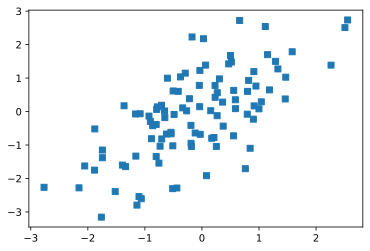

In [109]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'s')
plt.show()

In [110]:
from sklearn.model_selection import train_test_split 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, shuffle= True, batch_size = 20)
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [112]:
for x,y in train_loader:
    print(x.shape, y.shape)

torch.Size([20, 1]) torch.Size([20, 1])
torch.Size([20, 1]) torch.Size([20, 1])
torch.Size([20, 1]) torch.Size([20, 1])
torch.Size([20, 1]) torch.Size([20, 1])


In [113]:
class ANNreg(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()
        
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers
        
        #input layer
        self.layers['input'] = nn.Linear(1, nUnits)
        
        # hidden layer
        for i in range(nLayers):
            self.layers[f'hidden {i}'] = nn.Linear(nUnits, nUnits)
        
        # output layer
        self.layers['output'] = nn.Linear(nUnits, 1)
        
    def forward(self, x):
        x = self.layers['input'](x)
        
        for i in range(self.nLayers):
            x = F.relu(self.layers[f'hidden {i}'](x))
        
        x = self.layers['output'](x)
        
        return x

In [114]:
nUnits = 4
nLayers = 4
numepochs = 1000

def trainModel(model):
    train_losses = []
    test_losses = []
    for epochi in range(numepochs):
        lossfun = nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
        
        batchLoss = []
        for X, y in train_loader:
            
            yHat = model(X)
            
            loss = lossfun(yHat, y)
            batchLoss.append(loss.detach())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        train_losses.append(np.mean(batchLoss))
        
        X, y = next(iter(test_loader))
        yHat = model(X)
        loss = lossfun(yHat, y)
        test_losses.append(loss.detach())
    
    return train_losses, test_losses

In [115]:
net = ANNreg(nUnits, nLayers)
train_losses, test_losses = trainModel(net)
print(f'Final TRAIN loss: {train_losses[-1]:.2f}')
print(f'Final TEST loss: {test_losses[-1]:.2f}')

Final TRAIN loss: 0.84
Final TEST loss: 1.37


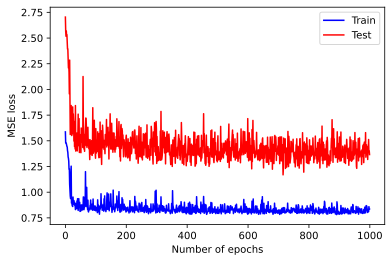

In [116]:
plt.plot(train_losses, 'b')
plt.plot(test_losses, 'r')

plt.xlabel('Number of epochs')
plt.ylabel('MSE loss')
plt.legend(['Train', 'Test']);